In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
from mnist import load_mnist
train, validation, test = load_mnist()

X = train[0]
labels = train[1]

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


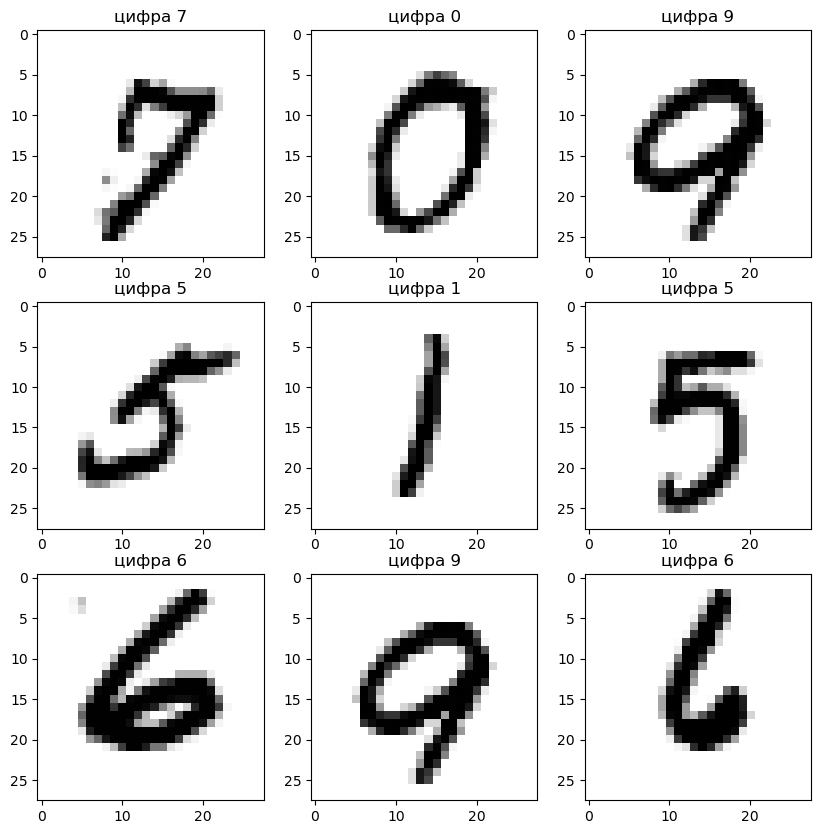

In [16]:
fig, number = plt.subplots(3, 3, figsize = (10,10))

for i in range(3):
    for j in range(3):
        n = np.random.randint(100)
        number[i, j].imshow(X[n], cmap = 'gist_yarg')
        number[i, j].set_title(f'цифра {str(labels[n])}')

In [92]:
class my_PCA():
    def __init__(self, n_components):
        self.n_components = n_components
    
    def fit(self, X):
        Xc = X - np.mean(X, axis = 0)
        Xc = Xc / (Xc.std(axis = 0) + 1e-8)
        C = Xc.T.dot(Xc)
        lmbd, F = np.linalg.eigh(C)
        lmbd = lmbd[::-1]
        F = F[:, ::-1]
        return Xc, lmbd, F
    
    def transform(self, X, F):
        Y = X.dot(F)
        return Y
    
    def fit_transform(self, X):
        Xc, lmbd, F = self.fit(X)
        Y = self.transform(Xc, F[:, :(self.n_components)])
        return Y

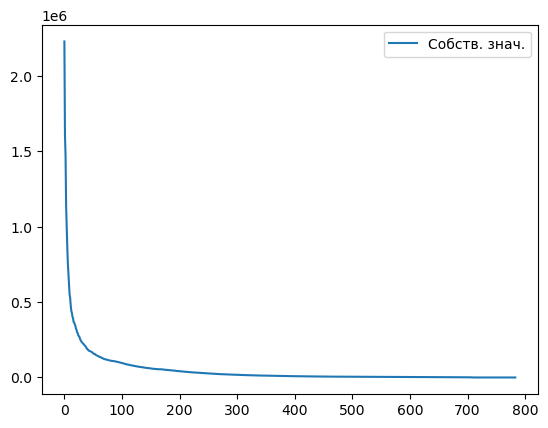

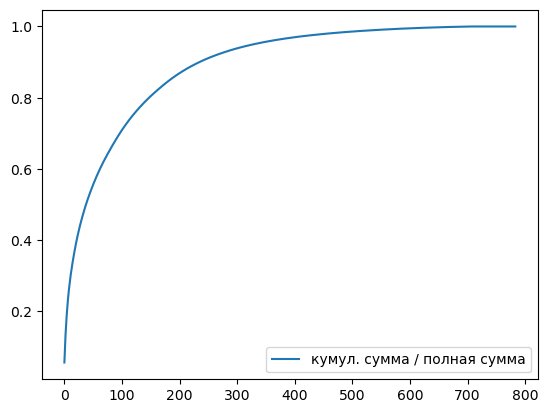

In [93]:
pca = my_PCA(n_components = 2)
Y = pca.fit(X.reshape(-1,784))

plt.plot(Y[1], label = 'Собств. знач.')
plt.legend()
plt.show()

plt.plot(np.cumsum(Y[1]) / np.sum(Y[1]), label = 'кумул. сумма / полная сумма')
plt.legend()

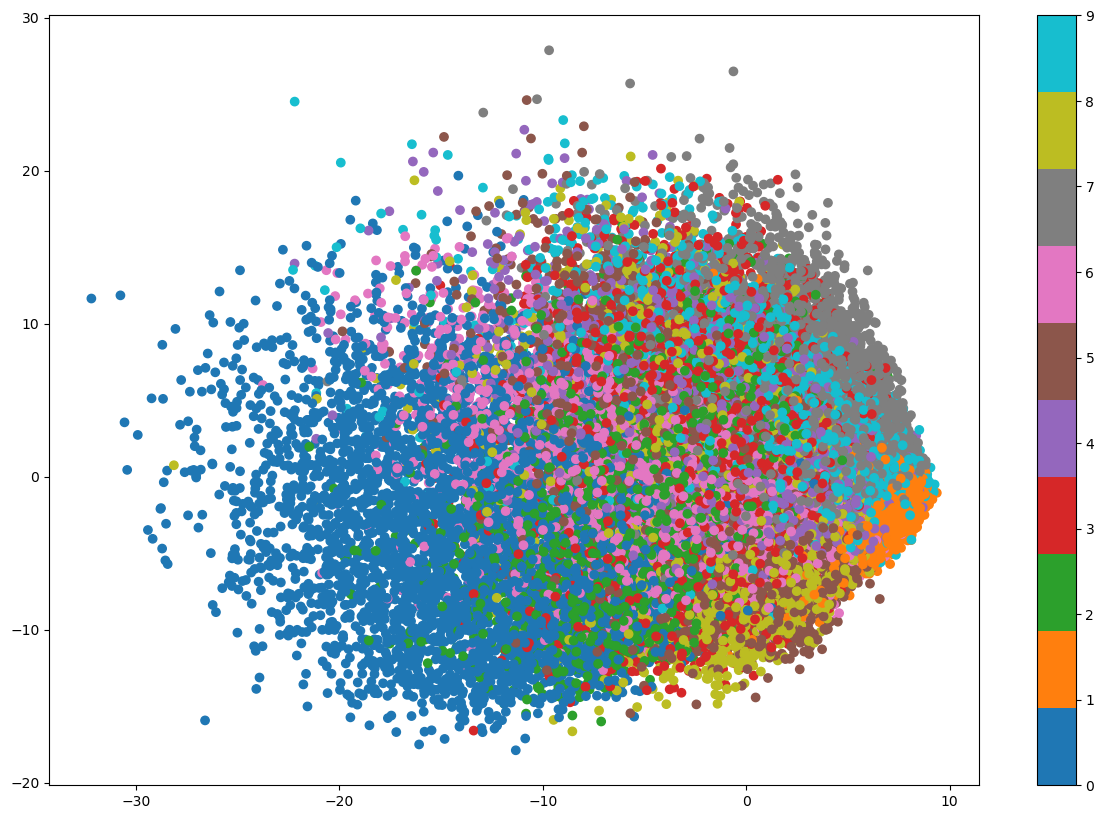

In [89]:
Y = pca.fit_transform(X.reshape(-1,784))
X1 = Y[:, 0]
Y1 = Y[:, 1]

plt.figure(figsize=(15,10))
plt.scatter(X1, Y1, c = labels, cmap='tab10')
plt.colorbar()

In [76]:
class my_kNN():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            x_dist = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            x_dist_min = np.argsort(x_dist)
            x_near = x_dist_min[:self.n_neighbors]
            label_near = self.y_train[x_near]
            y_pred.append(np.bincount(label_near).argmax())
        return np.array(y_pred)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,784), labels, test_size=1000, random_state=42)

pca = my_PCA(n_components = 2)
pca.fit(X_train)
X_new_train = pca.transform(X_train)
X_new_test = pca.transform(X_test)